# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [1]:
import requests  
import json
import pandas as pd
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp
import geocoder

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [2]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [3]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [4]:
data

{'executionTime': '2019-02-19 10:52:50 AM',
 'stationBeanList': [{'id': 304,
   'stationName': 'Broadway & Battery Pl',
   'availableDocks': 3,
   'totalDocks': 33,
   'latitude': 40.70463334,
   'longitude': -74.01361706,
   'statusValue': 'In Service',
   'statusKey': 1,
   'availableBikes': 30,
   'stAddress1': 'Broadway & Battery Pl',
   'stAddress2': '',
   'city': '',
   'postalCode': '',
   'location': '',
   'altitude': '',
   'testStation': False,
   'lastCommunicationTime': '2019-02-19 10:52:23 AM',
   'landMark': ''},
  {'id': 359,
   'stationName': 'E 47 St & Park Ave',
   'availableDocks': 36,
   'totalDocks': 64,
   'latitude': 40.75510267,
   'longitude': -73.97498696,
   'statusValue': 'In Service',
   'statusKey': 1,
   'availableBikes': 24,
   'stAddress1': 'E 47 St & Park Ave',
   'stAddress2': '',
   'city': '',
   'postalCode': '',
   'location': '',
   'altitude': '',
   'testStation': False,
   'lastCommunicationTime': '2019-02-19 10:52:30 AM',
   'landMark': ''}

In [5]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,30,3,,304,,2019-02-19 10:52:23 AM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33
1,,24,36,,359,,2019-02-19 10:52:30 AM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64
2,,17,27,,377,,2019-02-19 10:52:48 AM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45
3,,5,31,,402,,2019-02-19 10:52:33 AM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39
4,,35,6,,520,,2019-02-19 10:52:19 AM,40.759923,,-73.976485,,W 52 St & 5 Ave,,W 52 St & 5 Ave,1,In Service,False,41
5,,1,15,,3255,,2019-02-19 10:51:47 AM,40.750585,,-73.994685,,8 Ave & W 31 St,,8 Ave & W 31 St,1,In Service,False,19
6,,12,27,,3443,,2019-02-19 10:51:22 AM,40.761330,,-73.979820,,W 52 St & 6 Ave,,W 52 St & 6 Ave,1,In Service,False,41
7,,9,43,,72,,2019-02-19 10:50:14 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,55
8,,23,8,,79,,2019-02-19 10:50:50 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
9,,24,2,,82,,2019-02-19 10:50:39 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27


In [6]:
# there is one row for each bike station.  How many stations are there? 
len(df)

814

In [7]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

array([-74.0836394 ,  40.65539977, -73.9077436 ,  40.81439444])

In [8]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

array([ 961064.73659426,  178056.37414829, 1009803.53178432,
        235986.42166716])

In [9]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

414 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

# Answer 1

In [10]:
staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
print(sum(in_si), 'stations in staten island')

0 stations in staten island


In [11]:
brooklyn = boros.geometry[1]
in_bk = df.geometry.within(brooklyn)
print(sum(in_bk), 'stations in brooklyn')

268 stations in brooklyn


In [12]:
queens = boros.geometry[2]
in_qn = df.geometry.within(queens)
print(sum(in_qn), 'stations in queens')

82 stations in queens


In [13]:
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

414 stations in Manhattan


In [14]:
bronx = boros.geometry[4]
in_mn = df.geometry.within(bronx)
print(sum(in_mn), 'stations in bronx')

0 stations in bronx


# Answer 2

In [16]:
staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
print(sum(df['availableBikes'][in_si]))

0


In [17]:
brooklyn = boros.geometry[1]
in_bk = df.geometry.within(brooklyn)
print(sum(df['availableBikes'][in_bk]))

3363


In [18]:
queens = boros.geometry[2]
in_qn = df.geometry.within(queens)
print(sum(df['availableBikes'][in_qn]))

415


In [19]:
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(df['availableBikes'][in_mn]))

6418


In [20]:
bronx = boros.geometry[4]
in_bx = df.geometry.within(bronx)
print(sum(df['availableBikes'][in_bx]))

0


Answer 3

In [22]:
#The following example shows how to use the Google geocoding API to get the locations of boroughs in 
#New York City, and plots those locations along with the detailed borough boundary file
# we can easily read a shapefile
boros = gp.read_file(gp.datasets.get_path("nybb"))

In [23]:
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

In [24]:
boro_locations = gp.tools.geocode(boros.BoroName, provider='google')

C:\Users\moni_\Anaconda3\lib\site-packages\geopandas\tools\geocoding.py:121: UserWarning: Since July 2018 Google requires each request to have an API key. Pass a valid `api_key` to GoogleV3 geocoder to hide this warning. See https://developers.google.com/maps/documentation/geocoding/usage-and-billing
  coder = provider(**kwargs)


In [25]:
boro_locations

,geometry,address
0,GEOMETRYCOLLECTION EMPTY,NaN
1,GEOMETRYCOLLECTION EMPTY,NaN
2,GEOMETRYCOLLECTION EMPTY,NaN
3,GEOMETRYCOLLECTION EMPTY,NaN
4,GEOMETRYCOLLECTION EMPTY,NaN


In [26]:
import matplotlib.pyplot as plt

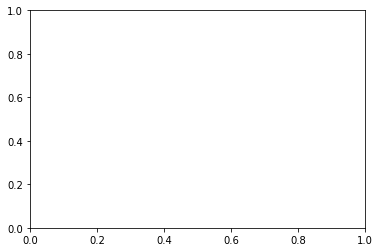

In [27]:
 fig, ax = plt.subplots()

In [28]:
#Another way to find co-ordinate
df['Coordinates'] = list(zip(df.longitude, df.latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gp.GeoDataFrame(df, geometry='Coordinates')
print(gdf.head())

  altitude  availableBikes  availableDocks city   id landMark  \
0                       30               3       304            
1                       24              36       359            
2                       17              27       377            
3                        5              31       402            
4                       35               6       520            

    lastCommunicationTime   latitude location  longitude postalCode  \
0  2019-02-19 10:52:23 AM  40.704633          -74.013617              
1  2019-02-19 10:52:30 AM  40.755103          -73.974987              
2  2019-02-19 10:52:48 AM  40.722438          -74.005664              
3  2019-02-19 10:52:33 AM  40.740343          -73.989551              
4  2019-02-19 10:52:19 AM  40.759923          -73.976485              

              stAddress1 stAddress2            stationName  statusKey  \
0  Broadway & Battery Pl             Broadway & Battery Pl          1   
1     E 47 St & Park Ave            

In [29]:
g = geocoder.google('Franklin St & W Broadway, NY')
g.json

[]

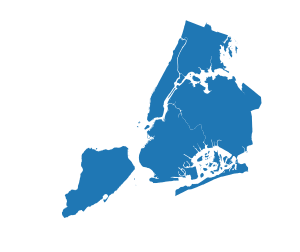

In [30]:
#plot without axis
boros = gp.read_file('nybb_15b/nybb.shp')
boros.reset_index(inplace=True)
boros.set_index('BoroName', inplace=True)
boros.sort_values(by='BoroCode', inplace=True)
# we can easily plot these. 
p = boros.plot()
p.set_axis_off()
p.plot()

In [32]:
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry,Coordinates
0,,30,3,,304,,2019-02-19 10:52:23 AM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33,POINT (980474.5127561709 195993.6964498408),POINT (-74.01361706 40.70463334)
1,,24,36,,359,,2019-02-19 10:52:30 AM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64,POINT (991179.9038325883 214381.943780388),POINT (-73.97498696 40.75510267)
2,,17,27,,377,,2019-02-19 10:52:48 AM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45,POINT (982679.8907825906 202480.2214391762),POINT (-74.00566443 40.72243797)
3,,5,31,,402,,2019-02-19 10:52:33 AM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39,POINT (987145.5291465931 209003.7784183958),POINT (-73.98955109000001 40.7403432)
4,,35,6,,520,,2019-02-19 10:52:19 AM,40.759923,,-73.976485,,W 52 St & 5 Ave,,W 52 St & 5 Ave,1,In Service,False,41,POINT (990764.3536682081 216137.8937087742),POINT (-73.97648516 40.75992262)
5,,1,15,,3255,,2019-02-19 10:51:47 AM,40.750585,,-73.994685,,8 Ave & W 31 St,,8 Ave & W 31 St,1,In Service,False,19,POINT (985722.6805079071 212735.1920977242),POINT (-73.9946848154068 40.7505853470215)
6,,12,27,,3443,,2019-02-19 10:51:22 AM,40.761330,,-73.979820,,W 52 St & 6 Ave,,W 52 St & 6 Ave,1,In Service,False,41,POINT (989840.3759118057 216650.3564584734),POINT (-73.97982001304626 40.76132983124814)
7,,9,43,,72,,2019-02-19 10:50:14 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,55,POINT (985931.7065028953 218814.7571059955),POINT (-73.99392888 40.76727216)
8,,23,8,,79,,2019-02-19 10:50:50 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864139 201269.770346975),POINT (-74.00666661 40.71911552)
9,,24,2,,82,,2019-02-19 10:50:39 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.1315763213 198376.4207269395),POINT (-74.00016545 40.71117416)


In [42]:
boros.head()

,index,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,,
Manhattan,3,1,358408.460709,6.364467e+08,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,4,2,464400.198868,1.186973e+09,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,1,3,741185.900596,1.937597e+09,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,2,4,897040.298576,3.045168e+09,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,0,5,330466.075042,1.623827e+09,(POLYGON ((970217.0223999023 145643.3322143555...


In [41]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry,Coordinates
0,,30,3,,304,,2019-02-19 10:52:23 AM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33,POINT (980474.5127561709 195993.6964498408),POINT (-74.01361706 40.70463334)
1,,24,36,,359,,2019-02-19 10:52:30 AM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64,POINT (991179.9038325883 214381.943780388),POINT (-73.97498696 40.75510267)
2,,17,27,,377,,2019-02-19 10:52:48 AM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45,POINT (982679.8907825906 202480.2214391762),POINT (-74.00566443 40.72243797)
3,,5,31,,402,,2019-02-19 10:52:33 AM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39,POINT (987145.5291465931 209003.7784183958),POINT (-73.98955109000001 40.7403432)
4,,35,6,,520,,2019-02-19 10:52:19 AM,40.759923,,-73.976485,,W 52 St & 5 Ave,,W 52 St & 5 Ave,1,In Service,False,41,POINT (990764.3536682081 216137.8937087742),POINT (-73.97648516 40.75992262)


In [44]:
#In a Spatial Join, two geometry objects are merged based on their spatial relationship to 
#one another.
intersection=gp.sjoin(df, boros, how="inner", op='intersects')


In [45]:
intersection

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,...,statusValue,testStation,totalDocks,geometry,Coordinates,index_right,index,BoroCode,Shape_Leng,Shape_Area
0,,30,3,,304,,2019-02-19 10:52:23 AM,40.704633,,-74.013617,...,In Service,False,33,POINT (980474.5127561709 195993.6964498408),POINT (-74.01361706 40.70463334),Manhattan,3,1,358408.460709,6.364467e+08
1,,24,36,,359,,2019-02-19 10:52:30 AM,40.755103,,-73.974987,...,In Service,False,64,POINT (991179.9038325883 214381.943780388),POINT (-73.97498696 40.75510267),Manhattan,3,1,358408.460709,6.364467e+08
2,,17,27,,377,,2019-02-19 10:52:48 AM,40.722438,,-74.005664,...,In Service,False,45,POINT (982679.8907825906 202480.2214391762),POINT (-74.00566443 40.72243797),Manhattan,3,1,358408.460709,6.364467e+08
3,,5,31,,402,,2019-02-19 10:52:33 AM,40.740343,,-73.989551,...,In Service,False,39,POINT (987145.5291465931 209003.7784183958),POINT (-73.98955109000001 40.7403432),Manhattan,3,1,358408.460709,6.364467e+08
4,,35,6,,520,,2019-02-19 10:52:19 AM,40.759923,,-73.976485,...,In Service,False,41,POINT (990764.3536682081 216137.8937087742),POINT (-73.97648516 40.75992262),Manhattan,3,1,358408.460709,6.364467e+08
5,,1,15,,3255,,2019-02-19 10:51:47 AM,40.750585,,-73.994685,...,In Service,False,19,POINT (985722.6805079071 212735.1920977242),POINT (-73.9946848154068 40.7505853470215),Manhattan,3,1,358408.460709,6.364467e+08
6,,12,27,,3443,,2019-02-19 10:51:22 AM,40.761330,,-73.979820,...,In Service,False,41,POINT (989840.3759118057 216650.3564584734),POINT (-73.97982001304626 40.76132983124814),Manhattan,3,1,358408.460709,6.364467e+08
7,,9,43,,72,,2019-02-19 10:50:14 AM,40.767272,,-73.993929,...,In Service,False,55,POINT (985931.7065028953 218814.7571059955),POINT (-73.99392888 40.76727216),Manhattan,3,1,358408.460709,6.364467e+08
8,,23,8,,79,,2019-02-19 10:50:50 AM,40.719116,,-74.006667,...,In Service,False,33,POINT (982402.0068864139 201269.770346975),POINT (-74.00666661 40.71911552),Manhattan,3,1,358408.460709,6.364467e+08
9,,24,2,,82,,2019-02-19 10:50:39 AM,40.711174,,-74.000165,...,In Service,False,27,POINT (984204.1315763213 198376.4207269395),POINT (-74.00016545 40.71117416),Manhattan,3,1,358408.460709,6.364467e+08
